## Import Libraries

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

##  load dataset 

In [52]:
dataframe = pd.read_csv('dataset.csv')
dataframe.head()          # show first five data

,Size,Bed,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Preprocessing Dataset

## Find Missing Values (If any)
In order to check missing values in Pandas DataFrame, we use a function isnull() and notnull(). Both function help in checking whether a value is NaN or not. These function can also be used in Pandas Series in order to find null values in a series


In [31]:
n_missing_size = sum(dataframe.Size.isnull())   # missing values for Size Column
print("missing values in size column:",n_missing_size)

n_missing_bed = sum(dataframe.Bed.isnull())   # missing values for Bed Column
print("missing values in bed column:",n_missing_size)

n_missing_price = sum(dataframe.Size.isnull())   # missing values for Price Column
print("missing values in price column:",n_missing_size)

missing values in size column: 0
missing values in bed column: 0
missing values in price column: 0


In [32]:
dataframe.describe()

,Size,Bed,Price
count,46.000000,46.000000,46.000000
mean,2010.826087,3.173913,340967.282609
std,800.400714,0.768963,126363.133932
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1889.000000,3.000000,299900.000000
75%,2284.500000,4.000000,392175.000000
max,4478.000000,5.000000,699900.000000


### Histogram

In [33]:
cdf = dataframe[['Size','Bed','Price',]]
cdf.head()

,Size,Bed,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


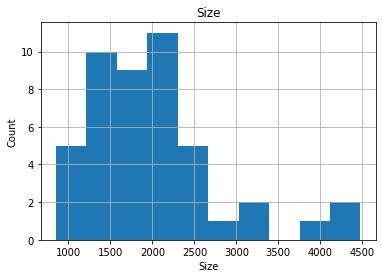

(Text(0.5, 1.0, 'Size'), None)

In [34]:
# For Size
ENGINESIZE = cdf['Size']
ENGINESIZE.hist()
plt.xlabel('Size'), plt.ylabel('Count')
plt.title("Size"), plt.show()

(Text(0.5, 1.0, 'Bed'),
 <function matplotlib.pyplot.show(close=None, block=None)>)

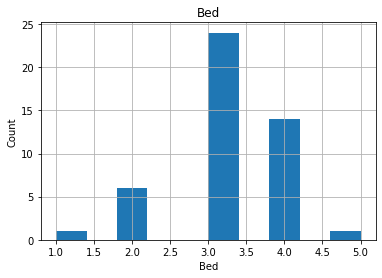

In [35]:
# For Bed
ENGINESIZE = cdf['Bed']
ENGINESIZE.hist()
plt.xlabel('Bed'), plt.ylabel('Count')
plt.title("Bed"), plt.show

## Scatterplot

<AxesSubplot:xlabel='Size', ylabel='Price'>

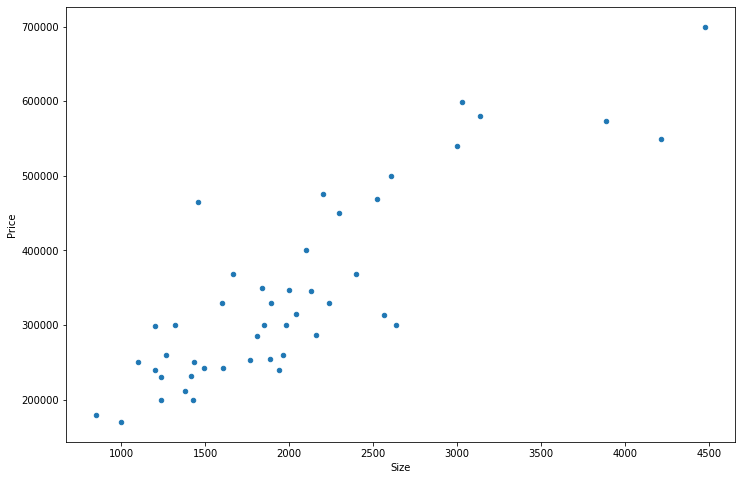

In [36]:
# Scatter plot using pandas
dataframe.plot.scatter(x='Size',y='Price',figsize=(12,8), colormap='viridis')

## Creating train and test dataset

In [37]:
mask = np.random.rand(len(dataframe)) < 0.8
train = cdf[mask]
test = cdf[~mask]
train.head()

,Size,Bed,Price
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900


In [38]:
test.head()

,Size,Bed,Price
0,2104,3,399900
8,1494,3,242500
9,1940,4,239999
18,3031,4,599000
19,1767,3,252900


## Train data distribution

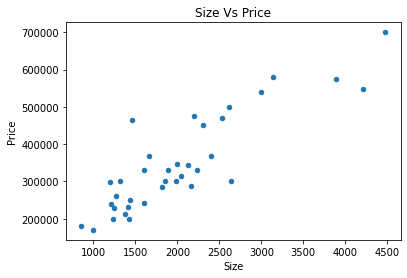

In [47]:
train.plot.scatter(x='Size',y='Price',title="Size Vs Price")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

## Test Data Distribution

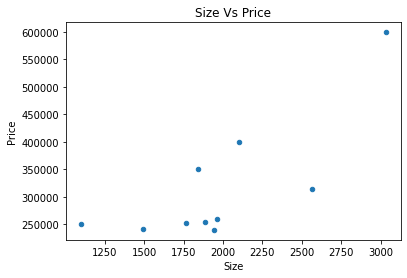

In [46]:
test.plot.scatter(x='Size',y='Price',title="Size Vs Price")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

## Build Model Using Scikit Learn


In [41]:
from sklearn import linear_model
simple_linear_regression = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Size']])
train_y = np.asanyarray(train[['Price']])

simple_linear_regression.fit(train_x, train_y)   # train the model

# The coefficients
print ('Coefficients: ', simple_linear_regression.coef_)
print ('Intercept: ',simple_linear_regression.intercept_)

Coefficients:  [[131.92445401]]
Intercept:  [81016.783374]


## Plot outputs draw the line over the data

Text(0, 0.5, 'Price')

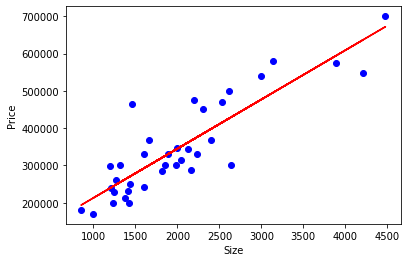

In [48]:
plt.scatter(train.Size, train.Price, color='blue')
plt.plot(train_x, simple_linear_regression.coef_[0][0]*train_x + simple_linear_regression.intercept_[0], '-r')
plt.xlabel("Size")
plt.ylabel("Price")